In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from pipeline import TrainingPipeline

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
model, X_test, y_test = TrainingPipeline().training_pipeline()

In [4]:
model.score(X_test, y_test)

0.905

In [5]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.905

In [11]:
model.feature_importances_

array([0.49964524, 0.49225999, 0.00809477])

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       112
           1       0.92      0.86      0.89        88

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



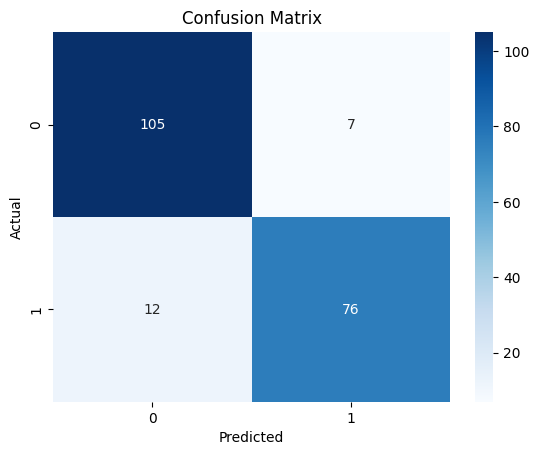

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

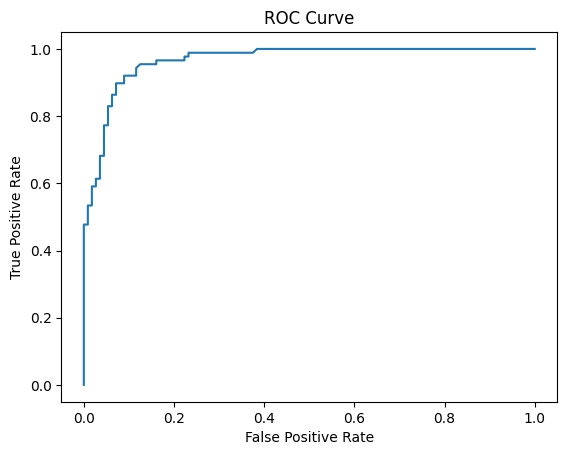

AUC: 0.9664163961038962


In [8]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("AUC:", roc_auc_score(y_test, y_proba))